In [1]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
from sklearn.preprocessing import StandardScaler

# Dropping the 'CustomerID' column as it's not relevant for clustering
data_cleaned = data.drop(columns=['CustomerID'])

# Encoding 'Gender' column
data_cleaned['Gender'] = data_cleaned['Gender'].map({'Male': 0, 'Female': 1})

# Selecting features for clustering (Age, Annual Income, Spending Score)
features = data_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Displaying the preprocessed data
scaled_features[:5]


array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

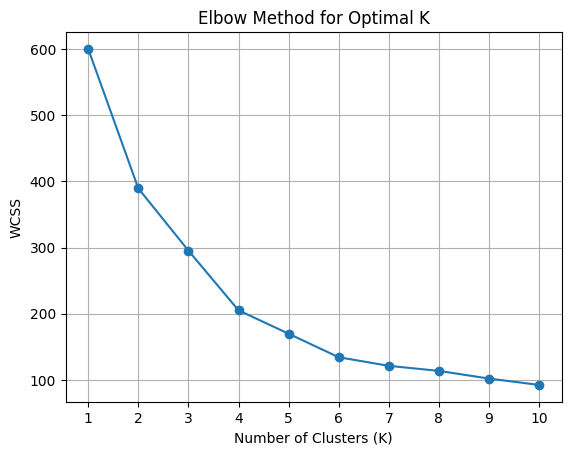

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

# Calculating WCSS for different number of clusters (1-10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
#plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [5]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)


In [6]:
data_cleaned['Cluster'] = cluster_labels


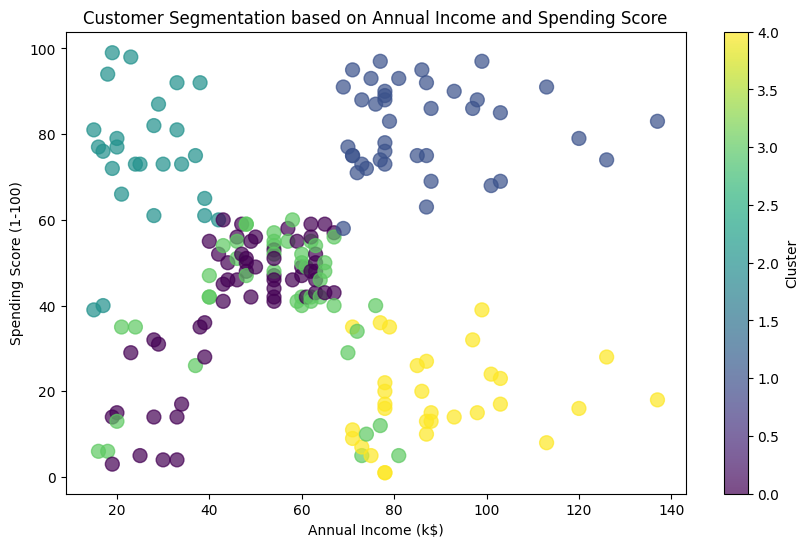

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Annual Income (k$)'], data_cleaned['Spending Score (1-100)'], 
            c=data_cleaned['Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()


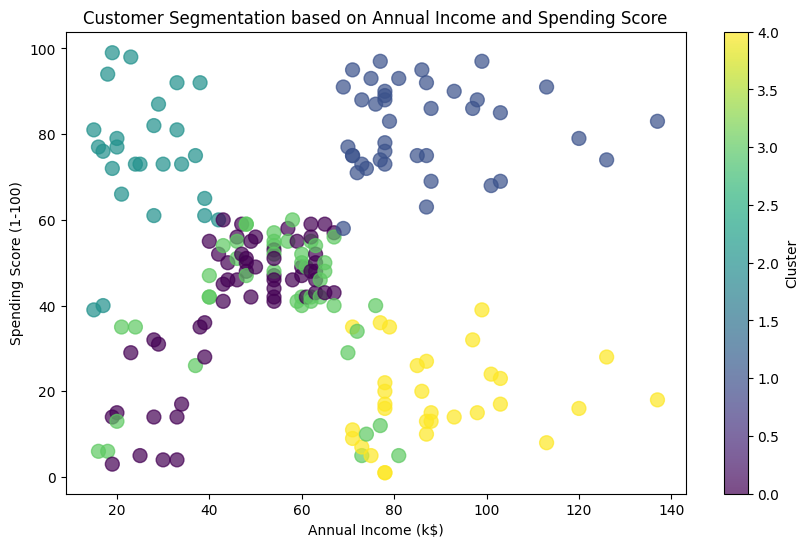

In [13]:
# Applying KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the original data
data_cleaned['Cluster'] = cluster_labels

# Visualizing the clusters in a 2D scatter plot using two features
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Annual Income (k$)'], data_cleaned['Spending Score (1-100)'], 
            c=data_cleaned['Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()


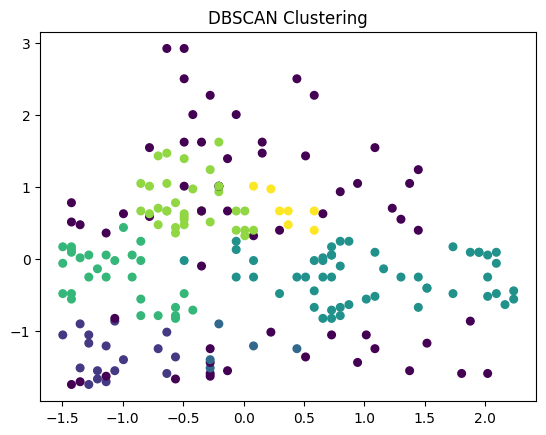

In [19]:
from sklearn.cluster import DBSCAN

# Define DBSCAN parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_features)

# Get labels (noise points will have label -1)
labels = dbscan.labels_

# Plot results
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, s=30, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()
